                                        The Sparks Foundation
                               Data Science and Business Analytics Internship
                               
        Task1: Stock Market Prediction using Numerical and Textual Analysis
        
        Objective of task: Create a hybrid model for stock price/performance prediction using numerical analysis of 
        historical stock prices, and sentimental analysis of news headlines 
        
        Done By:Subhaashini.K.R

1.Loading YahooFinance Dataset and extracting Apple stock price

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import pandas_datareader.data as web
from pandas import Series,DataFrame

start = datetime.datetime(2010,1,1)
end = datetime.datetime(2021,1,1)

df = web.DataReader("AAPL", 'yahoo',start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.549637
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.254608
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.440399
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.294067
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.267349


2.Exploring Rolling mean

In [2]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2020-12-17    116.361229
2020-12-18    116.679756
2020-12-21    117.002510
2020-12-22    117.261621
2020-12-23    117.484966
2020-12-24    117.711152
2020-12-28    117.980439
2020-12-29    118.193442
2020-12-30    118.420704
2020-12-31    118.621628
Name: Adj Close, dtype: float64

3.Plot of Moving Average vs Stock Price 

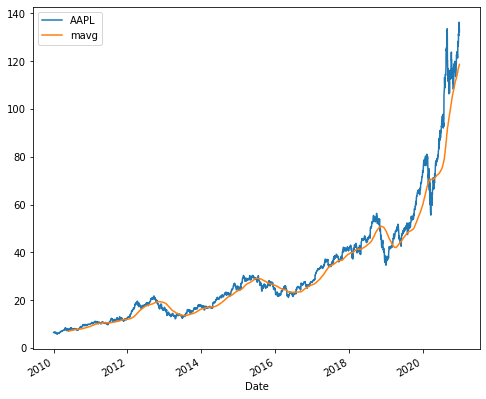

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

4.Determining Return Deviation

<AxesSubplot:xlabel='Date'>

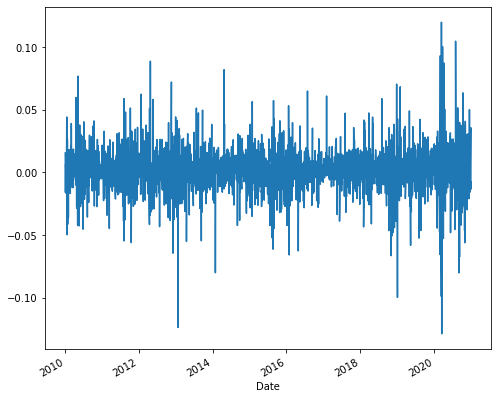

In [4]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

5.Analysing competitors stocks

In [5]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2020-12-24,131.549637,10.642152,1738.849976,121.686134,222.238144
2020-12-28,136.254608,10.632160,1776.089966,121.813004,224.443069
2020-12-29,134.440399,10.552218,1758.719971,120.817581,223.634918
2020-12-30,133.294067,10.702108,1739.520020,121.344566,221.170593
2020-12-31,132.267349,10.792042,1751.880005,122.847458,221.908905


6.Analysing how one stock affects the other

Symbols      AAPL        GE      GOOG       IBM      MSFT
Symbols                                                  
AAPL     1.000000  0.344234  0.527289  0.436050  0.556592
GE       0.344234  1.000000  0.363166  0.514259  0.384940
GOOG     0.527289  0.363166  1.000000  0.464971  0.611208
IBM      0.436050  0.514259  0.464971  1.000000  0.533409
MSFT     0.556592  0.384940  0.611208  0.533409  1.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

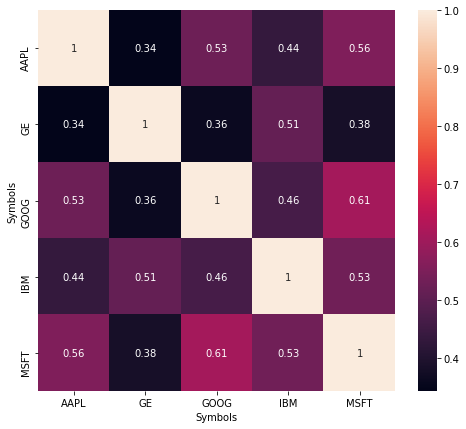

In [6]:
import seaborn as sns
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
print(corr)
sns.heatmap(corr, annot=True)

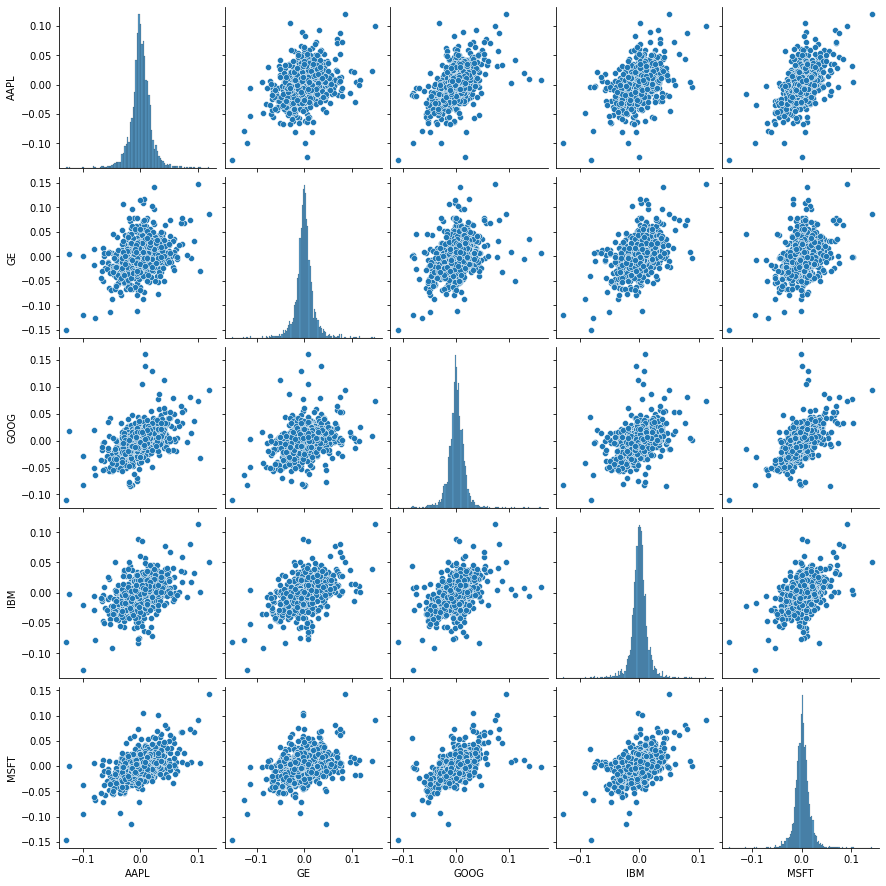

In [7]:
sns.pairplot(retscomp);

7. Plot for Risk vs Expected Returns

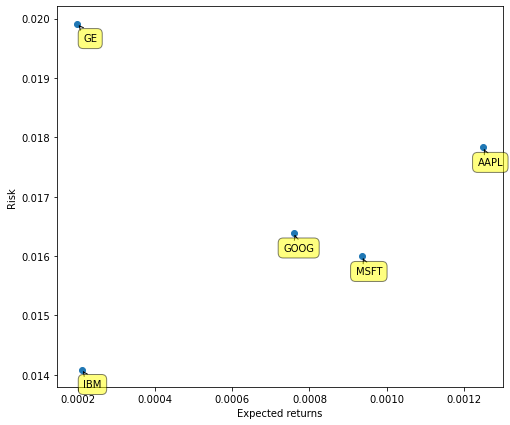

In [8]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


The three machine learning models used to predict the stock price includes Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K Nearest Neighbor (KNN)

In [9]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
dfreg = df[["Adj Close","Volume"]].copy()
dfreg['HL_PCT'] = (df['High'] - df['Low'])/df['Close'] * 100
dfreg['Change_PCT'] = (df['Close'] - df['Open'])/df['Open'] * 100
dfreg.head()

,Adj Close,Volume,HL_PCT,Change_PCT
Date,,,,
2009-12-31,6.471691,352410800.0,1.323974,-1.126080
2010-01-04,6.572422,493729600.0,0.990606,0.271752
2010-01-05,6.583784,601904800.0,1.091526,-0.102519
2010-01-06,6.479061,552160000.0,2.123529,-1.590632
2010-01-07,6.467082,477131200.0,1.400900,-0.552545


8.Pre-processing and Cross Validation

In [11]:
import math
import numpy as np
from sklearn import preprocessing

dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(dfreg['label'])
y = y[:-forecast_out]

9. Using Simple Linear Analysis & Quadratic Discriminant Analysis 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

10. Using K Nearest Neighbor (KNN)

In [14]:
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [15]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [16]:
print("# results")
print('The linear regression confidence is {}'.format(confidencereg))
print('The quadratic regression 2 confidence is {}'.format(confidencepoly2))
print('The quadratic regression 3 confidence is {}'.format(confidencepoly3))
print('The KNN confidence is {}'.format(confidenceknn))

# results
The linear regression confidence is 0.9562844888498626
The quadratic regression 2 confidence is 0.9578024238483253
The quadratic regression 3 confidence is 0.9565907757771923
The KNN confidence is 0.9526874419019828


In [17]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([123.3216366 , 119.43753193, 121.07468447, 122.01564331,
       122.59952656, 125.17617059, 129.06623629, 129.4561186 ,
       129.27003118, 128.55973086, 130.18733866, 130.80569572,
       127.81801326, 129.65544659, 128.70993752, 128.02408334,
       134.58756063, 134.44950971, 135.3743933 , 133.07203511,
       134.9044351 , 138.63696918, 137.71780542, 138.83822415,
       143.85632334, 141.67492573, 140.57582692, 139.4902277 ])

11.Plotting the prediction

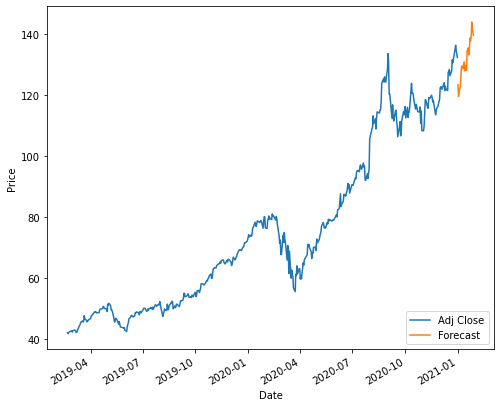

In [18]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


The forecast predicts that there would be downturn which is not too long and it recovers.So, we could buy the stocks during downturn and sell it during upturn.

# Sentimental analysis of news headlines

In [19]:
import pandas as pd
import numpy as np
df1=pd.read_csv('D:\dataset\india-news-headlines.csv')
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [20]:
df1.shape

(3424067, 3)

In [21]:
df1.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [22]:
df1.describe()

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [23]:
df1.max()

publish_date                                                  20201231
headline_category                                          young-turks
headline_text        Why should girls have all the fun? Boys prep ...
dtype: object

In [24]:
df1.min()

publish_date                                20010102
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [25]:
df1['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [26]:
df1.corr()

,publish_date
publish_date,1.0


In [27]:
df1['headline_text'].value_counts()

Straight Answers                                                    6723
Cartoons                                                            1536
Straight answers                                                    1500
Photogallery                                                        1353
Your say                                                            1012
                                                                    ... 
Government Medical College and Hospital panel records statements       1
HC restores security cover to YSR kin                                  1
TRS hits the Delhi trail                                               1
A gender bias even in kidney transplants                               1
TRS faces Kodandaram test in panchayat polls                           1
Name: headline_text, Length: 3168800, dtype: int64

In [28]:
df1['headline_category'].value_counts()

india                                                    288541
unknown                                                  209582
city.mumbai                                              134428
city.delhi                                               127717
business.india-business                                  116761
                                                          ...  
pms-us-visit                                                  8
year-ender-2015.march                                         8
preeti-shenoy                                                 8
lifespan-news                                                 8
best-products.home-decor-and-garden.living-room-decor         8
Name: headline_category, Length: 1013, dtype: int64

<AxesSubplot:>

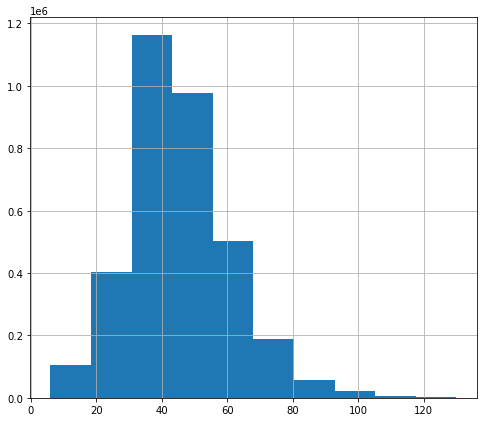

In [29]:
df1['headline_text'].str.len().hist()

In [30]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krsub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
corpus = []
new = df1['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [32]:
from collections import defaultdict
dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

In [33]:
from collections import Counter
counter=Counter(corpus)
most = counter.most_common()
x,y = [],[]
for word, count in most[:40]:
    if(word not in stop):
        x.append(word)
        y.append(count)


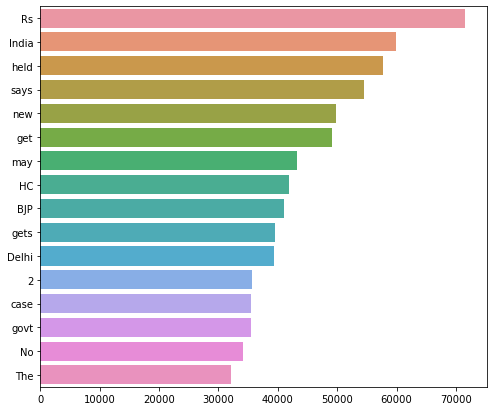

In [34]:
sns.barplot(x = y,y = x)
plt.show()

TextBlob

In [35]:
from textblob import TextBlob, Word,Blobber

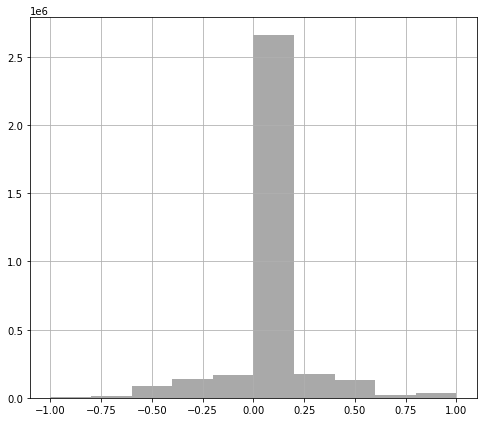

In [36]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score'] = df1['headline_text'].\
apply(lambda x:polarity(x))
df1['polarity_score'].hist(color='darkgrey')
plt.show()

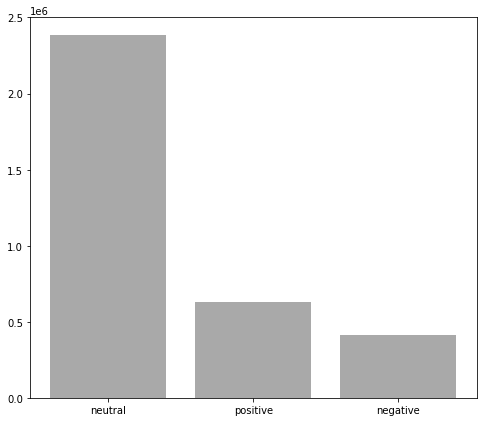

In [39]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
df1['polarity']=df1['polarity_score'].\
map(lambda x: sentiment(x))
plt.bar(df1.polarity.value_counts().index,
       df1.polarity.value_counts(),color='darkgrey')
plt.show()

In [41]:
df1[df1['polarity'] == 'positive']['headline_text'].head()

4            Extra buses to clear tourist traffic
12    Will Qureshi's return really help the govt?
30           Extra buses to clear tourist traffic
38    Will Qureshi's return really help the govt?
52          Come to Nandi Hills...and you can fly
Name: headline_text, dtype: object

In [42]:
df1[df1['polarity']=='negative']['headline_text'].head()

65         Destroying myths and doubts on sexuality
86         Powerless north India gropes in the dark
104                        10-year-old girl missing
131              Net lottery: A winner or a sucker?
142    Mental illness can pass from parent to child
Name: headline_text, dtype: object

In [43]:
wordcloud=df1['headline_category']

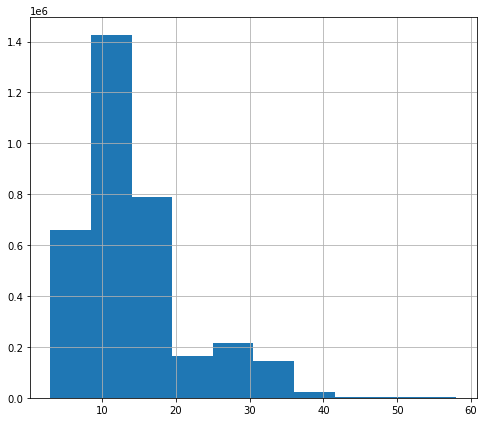

<Figure size 216x216 with 0 Axes>

In [44]:
wordcloud.str.len().hist()
plt.figure(figsize=(3,3))
plt.show()

# Thank you